<a href="https://colab.research.google.com/github/yasminmaigari-cmd/Data-Science/blob/main/formation_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!pip install lasio
import lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.9 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/yohanesnuwara/formation-evaluation

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 217 (delta 53), reused 37 (delta 37), pack-reused 147 (from 1)
Receiving objects: 100% (217/217), 13.68 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [5]:
import sys
sys.path.append('/content/formation-evaluation')
from well_log_display import well_log_display
from triple_combo import triple_combo
from ND_plot import ND_plot
from label_generator import label_generator


In [6]:
help(triple_combo)

Help on function triple_combo in module triple_combo:

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60, min_resistivity=0.01, max_resistivity=1000, min_NPHI=-0.15, max_NPHI=0.45, min_RHOB=1.95, max_RHOB=2.95, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)
    Producing Triple Combo log

    Input:

    df is your dataframe
    column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
    are column names that appear in your dataframe (originally from the LAS file)

    specify your depth limits; min_depth and max_depth

    input variables other than above are default. You can specify
    the values yourselves.

    Output:

    Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)



In [7]:
help(well_log_display)

Help on function well_log_display in module well_log_display:

well_log_display(df, column_depth, column_list, column_semilog=None, min_depth=None, max_depth=None, column_min=None, column_max=None, colors=None, fm_tops=None, fm_depths=None, tight_layout=1, title_size=10)
    Display log side‑by‑side style
    Input:
    df is your dataframe
    specify min_depth and max_depth as the upper and lower depth limit
    column_depth is the column name of your depth
    column_list is the LIST of column names that you will display

    column_semilog is specific for resistivity column; if your resistivities are
      in column 3, specify as: column_semilog=2. Default is None, so if you don't
      specify, the resistivity will be plotted in normal axis instead

    column_min is list of minimum values for the x‑axes.
    column_max is list of maximum values for the x‑axes.

    colors is the list of colors specified for each log names. Default is None,
      so if don't specify, the colors wi

### **load well log data**

In [8]:
filepath = '/content/formation-evaluation/data/volve/15_9-F-11A.LAS'

# read with lasio
well = lasio.read(filepath)
well_df = well.df()
well_df.head()

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,,
188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
well.keys()

['DEPTH',
 'ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RD',
 'RHOB',
 'RM',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

In [10]:
well.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

In [11]:
#renaming to ABDCQF01 TO DENSITY
well_df = well_df.rename(columns={'ABDCQF01': 'DENSITY'})

In [12]:
display(well_df.head())


,DENSITY,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
DEPTH,,,,,,,,,,,,,,,,,,,,,
188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
well.data

array([[ 188.5,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.6,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.7,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [3761.7,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.8,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.9,    nan,    nan, ...,    nan,    nan,    nan]])

In [26]:
well = well.reset_index(drop=True)

In [28]:
# Re-read the LAS file to get a fresh lasio object
las_data = lasio.read(filepath)

# Convert the lasio object to a pandas DataFrame using .df()
well_df_new = las_data.df()

# Reset the index of the new DataFrame, dropping the old index
well_df_new = well_df_new.reset_index(drop=True)

# Display the head of the new DataFrame to verify
display(well_df_new.head(10))

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,5.201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **GENERATE FORMATION LABELS FROM FORMATION TOPS FILE**

In [29]:
filepath = '/content/formation-evaluation/data/volve/Fmtops_15_9-F-11A.csv'

tops = pd.read_csv(filepath)

tops

,PICKS,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8
5,Heather Fm. Top,3574.9
6,Heather Fm. Sand VOLVE Top,3585.2
7,Hugin Fm. VOLVE Top,3594.6
8,Sleipner Fm. Top,3702.0


In [30]:
help(label_generator)

Help on function label_generator in module label_generator:

label_generator(df_well, df_tops, column_depth, label_name)
    Generate Formation (or other) Labels to Well Dataframe
    (useful for machine learning and EDA purpose)

    Input:

    df_well is your well dataframe (that originally doesn't have the intended label)
    df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
      1st column is the label name (e.g. formation top names)
      2nd column is the depth of each label name

    column_depth is the name of depth column on your df_well dataframe
    label_name is the name of label that you want to produce (e.g. FM. LABEL)

    Output:

    df_well is your dataframe that now has the labels (e.g. FM. LABEL)



In [31]:
well = label_generator(well,tops, 'DEPTH', 'FM. LABEL')

well

/content/formation-evaluation/label_generator.py:44: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_well[label_name].loc[indexes] = topnames
/content/formation-evaluation/label_generator.py:44: SettingWithCopyWarning: 
A value is trying to

,level_0,index,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,...,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL
0,0,0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,35730,35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,35731,35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,35732,35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,35733,35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


In [32]:
df_well = well
df_tops = tops
column_depth = "DEPTH"
label_name = "FM.LABEL"

well = label_generator(df_well, df_tops, column_depth, label_name)

well

/content/formation-evaluation/label_generator.py:44: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_well[label_name].loc[indexes] = topnames
/content/formation-evaluation/label_generator.py:44: SettingWithCopyWarning: 
A value is trying to

,level_0,index,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,...,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL,FM.LABEL
0,0,0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,35730,35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35731,35731,35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35732,35732,35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35733,35733,35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top


In [33]:
# Replace NaNs in formation label column with string called "Unknown"
well['FM. LABEL'] = well['FM. LABEL'].fillna('Unknown')

well

,level_0,index,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,...,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL,FM.LABEL
0,0,0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
1,1,1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
2,2,2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
3,3,3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
4,4,4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,35730,35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35731,35731,35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35732,35732,35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35733,35733,35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top


In [35]:
# Replace NaNs in formation label column with string called "Unknown"
mask_unknown = well['FM. LABEL'] == 'Unknown'
well.loc[mask_unknown, 'FM. LABEL'] = 'Unknown'


well

,level_0,index,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,...,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL,FM.LABEL
0,0,0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
1,1,1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
2,2,2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
3,3,3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
4,4,4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,35730,35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35731,35731,35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35732,35732,35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top
35733,35733,35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,...,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top,Sleipner Fm. Top


# **visualize**

# **WELL-LOG VISUALIZATION**

In [36]:
well_log_display

<function well_log_display.well_log_display(df, column_depth, column_list, column_semilog=None, min_depth=None, max_depth=None, column_min=None, column_max=None, colors=None, fm_tops=None, fm_depths=None, tight_layout=1, title_size=10)>

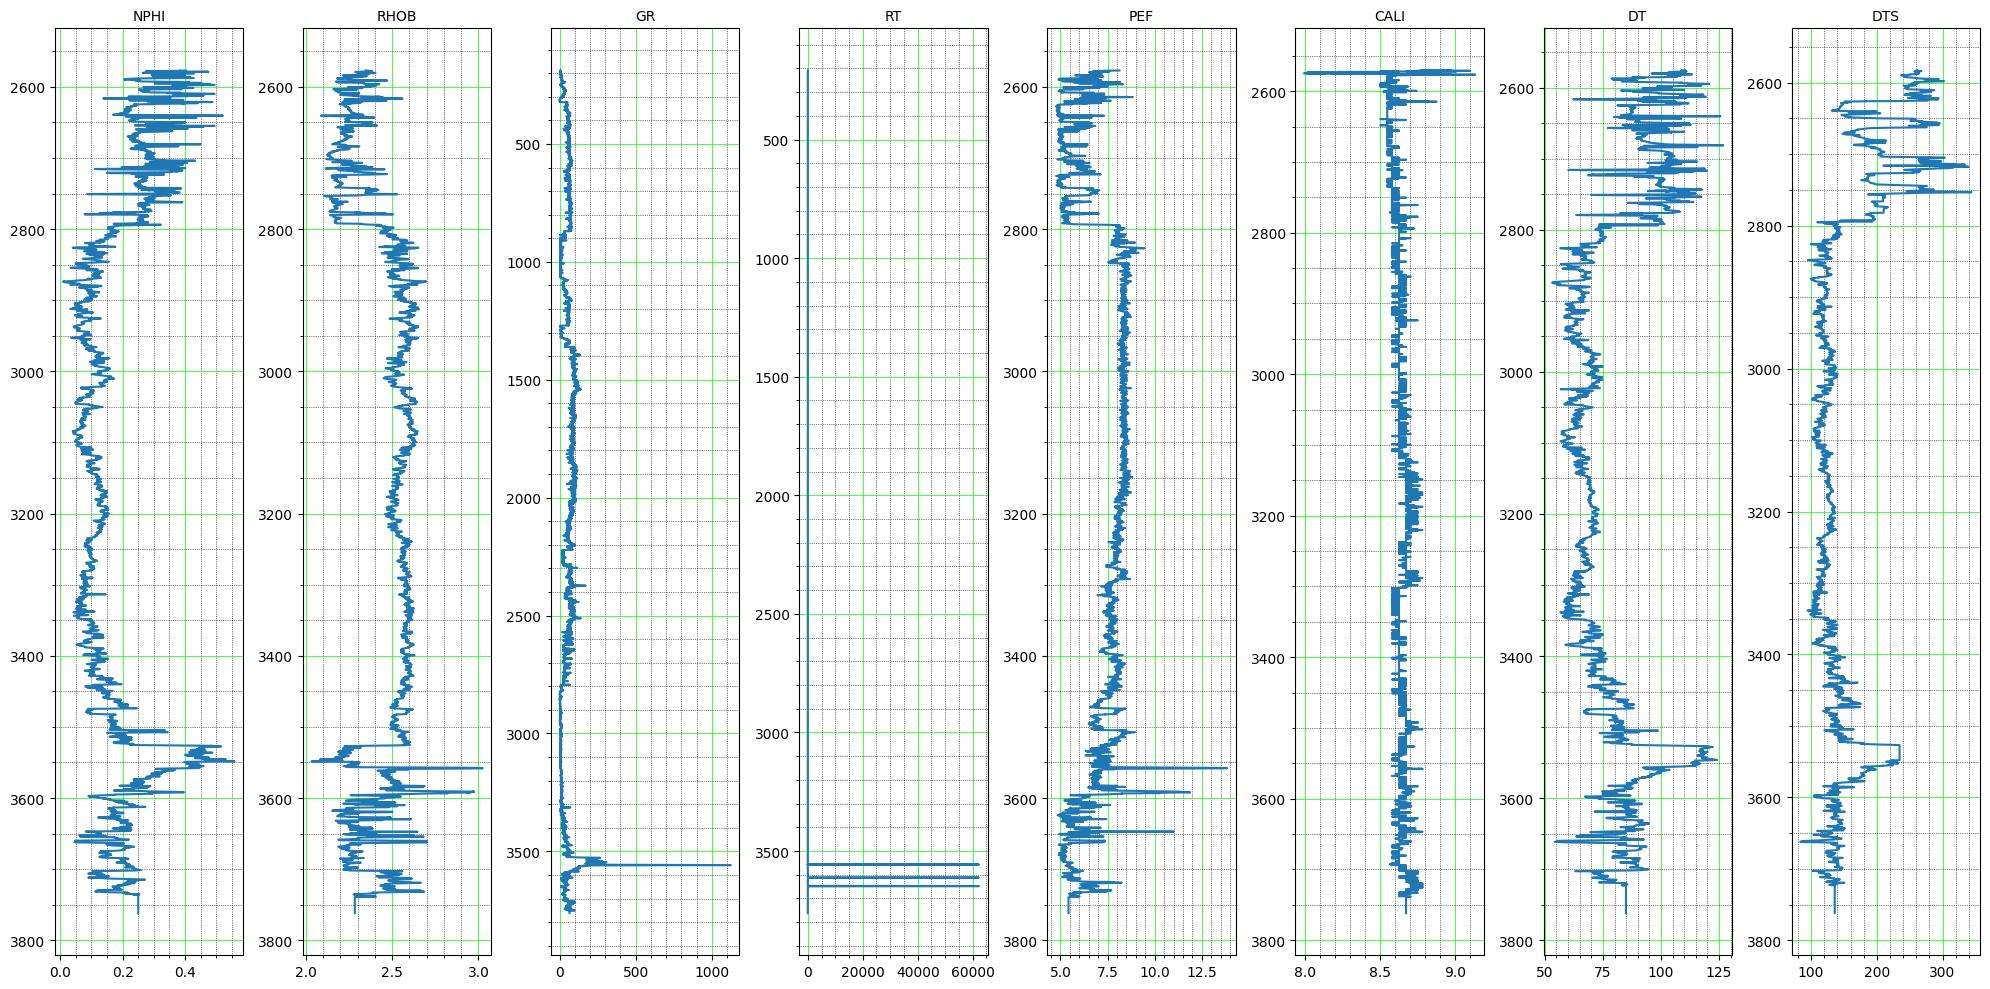

In [40]:
df_well = well
column_depth = "DEPTH"
column_list =['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'DTS']

well_log_display(df_well, column_depth, column_list)


In [41]:
column_list

['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'DTS']

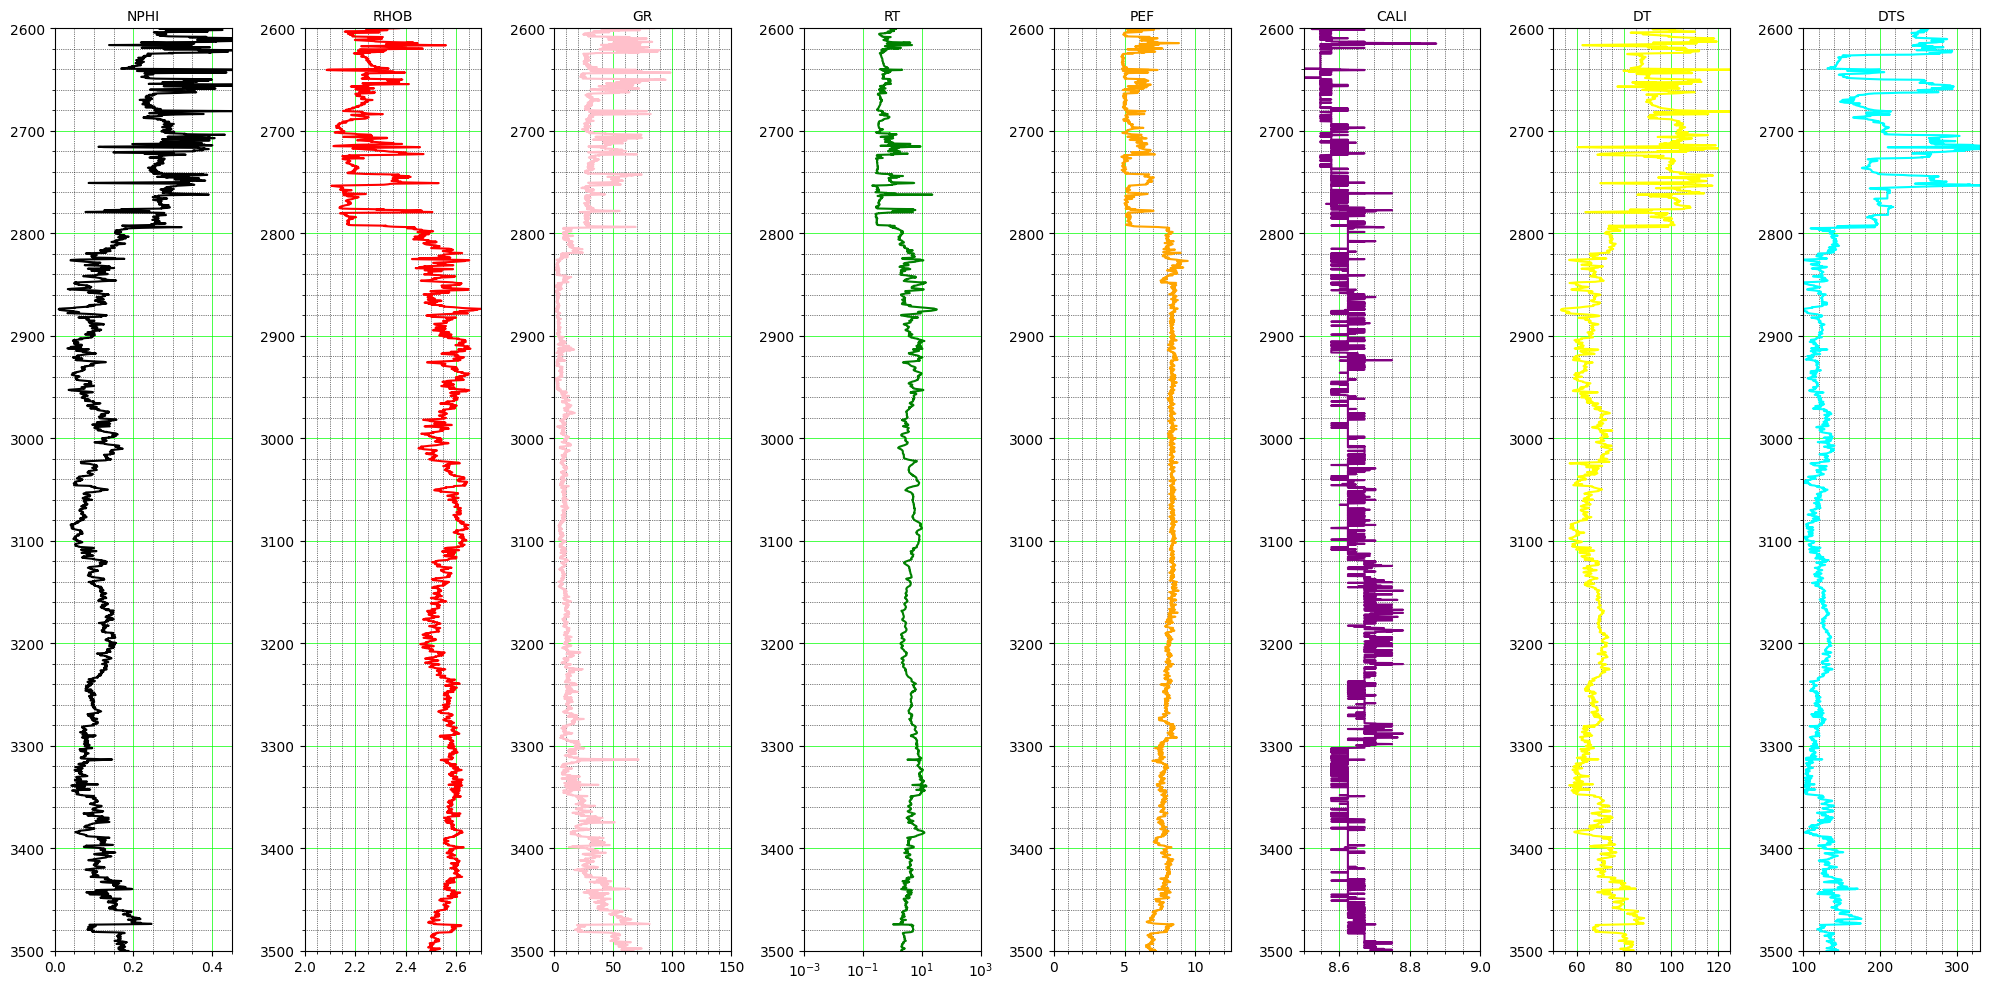

In [47]:
column_semilog=3
min_depth=2600
max_depth=3500
column_min=[0, 2, 0, 0.001, 0, 8.5, 50, 100]
column_max=[0.45, 2.7, 150, 1000, 12.5, 9, 125, 330]
colors=['black', 'red', 'pink', 'green', 'orange', 'purple', 'yellow', 'cyan']
title_size = 20
well_log_display(df_well, column_depth, column_list,
                 column_semilog, min_depth, max_depth,
                 column_min, column_max, colors)

# **Triple combo**
We are seeking hydrocarbon occurence in depth between 3,580 to 3,702 m. So, we'll visualize the crossover in a triple combo.
 We will use function triple_combo




In [46]:
help(triple_combo)

Help on function triple_combo in module triple_combo:

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60, min_resistivity=0.01, max_resistivity=1000, min_NPHI=-0.15, max_NPHI=0.45, min_RHOB=1.95, max_RHOB=2.95, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)
    Producing Triple Combo log

    Input:

    df is your dataframe
    column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
    are column names that appear in your dataframe (originally from the LAS file)

    specify your depth limits; min_depth and max_depth

    input variables other than above are default. You can specify
    the values yourselves.

    Output:

    Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)



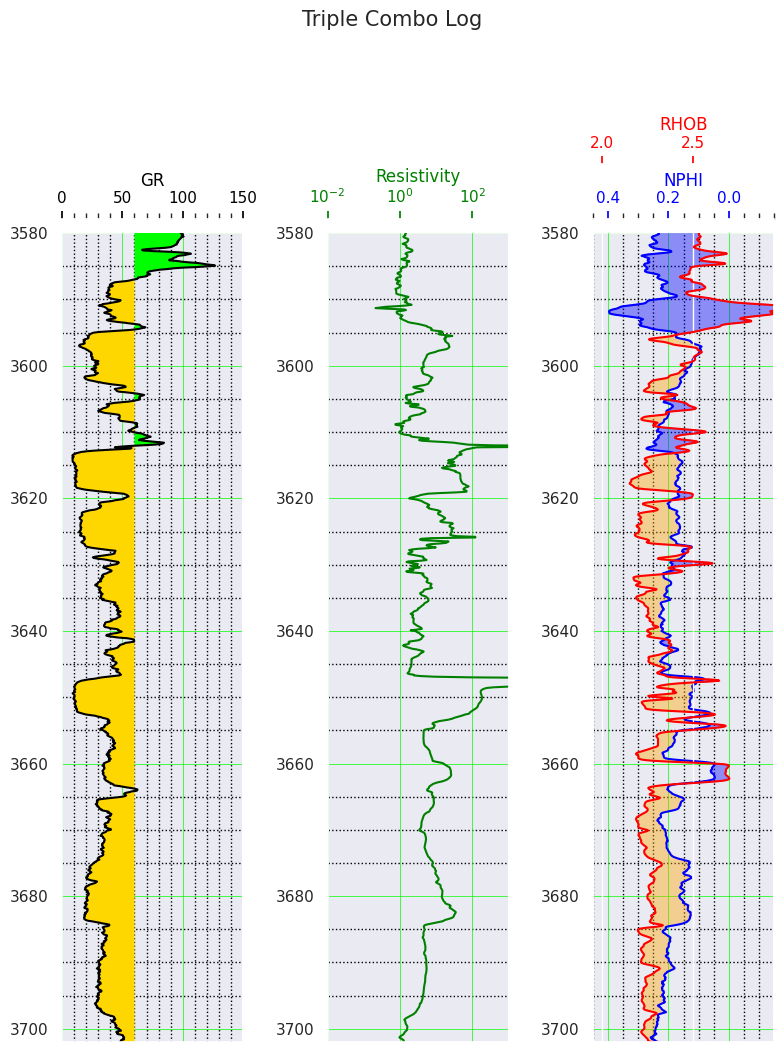

In [56]:
# triple combo at depth from 3,580 to 3,702 m
df = well
column_depth = 'DEPTH'
column_GR = 'GR'
column_resistivity = 'RT'
column_RHOB = 'RHOB'
column_NPHI = 'NPHI'
min_depth = 3580
max_depth = 3702

triple_combo(df, column_depth, column_GR, column_resistivity,
             column_NPHI, column_RHOB, min_depth, max_depth)

Neutron Density Plot
We wish to identify the lithologies of each formation (whether sandstone, limestone, or dolomite) using ND plot. We will use function ND_plot.

In [49]:
help(ND_plot)

Help on function ND_plot in module ND_plot:

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by, figsize=(7, 7), scatter_size=50, scatter_alpha=0.5)
    Producing Neutron-Density (Cross)plot

    Input:

    denfl is your fluid density
    df is your dataframe
    column_nphi and column_rhob are the column name of your NPHI and RHOB
    column_hue is the column name that you want for the color of the points
      e.g. depth, vshale, formation labels, etc.

    color_by depends on the column_hue that you're giving
      * if you're giving a continuous hue (numerical) like depth or vshale
        define color_by='continuous'
      * if you're giving a categorical hue (labels) like formation names
        define color_by='categorical'

    figsize, scatter_size, scatter_alpha are by default. You can also specify
      by yourselves.

    Output:

    3 lines. Blue is sandstone, black is limestone, red is dolomite
    Each line has dots representing porosity value from 0 to 

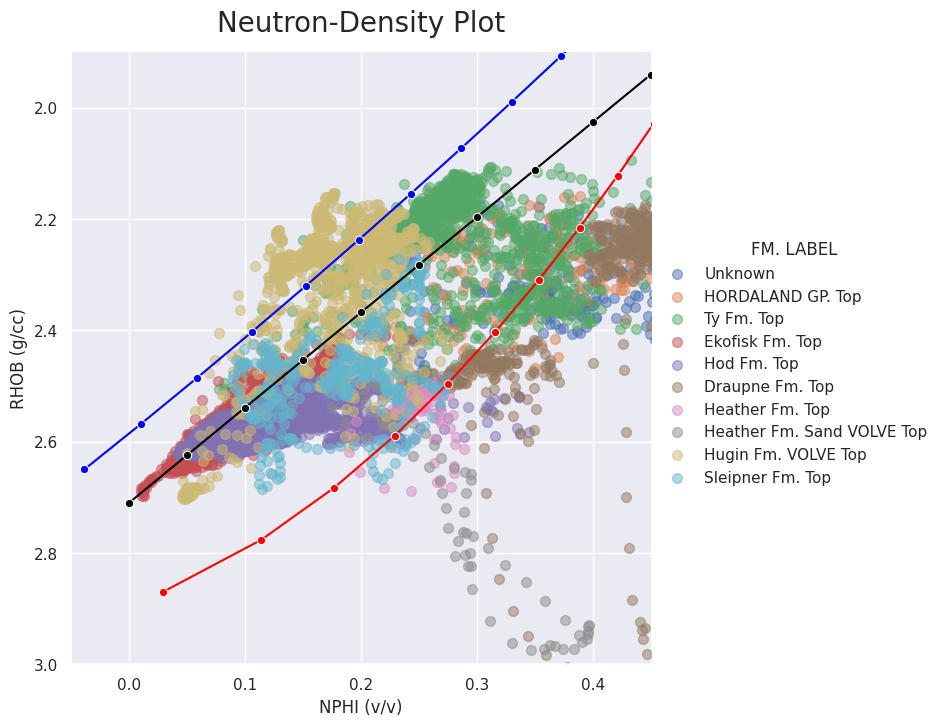

In [53]:
# use "ND_plot" to make a plot with colors based on formation names
denfl = 1
df = well
column_nphi = 'NPHI'
column_rhob = 'RHOB'
column_hue = 'FM. LABEL'
color_by = 'categorical'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)

Plot NPHI and RHOB points differentiated by depths/other continuous variables

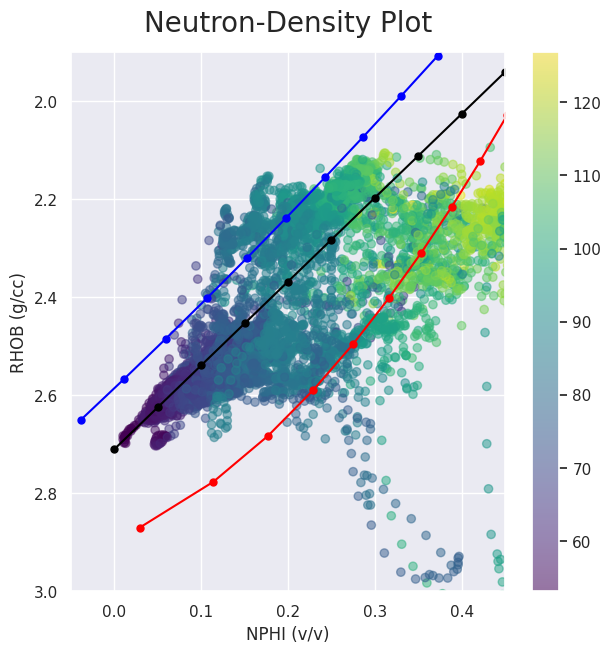

In [54]:
column_hue = 'DT'
color_by = 'continuous'

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by)
